we have a dataset containing various features about restaurants, and you want to predict the **aggregate rating** based on several factors like **Price Range**, **Cost for Two**, **Has Table Booking**, **Votes**, etc.

We will work on this **regression problem** because our target variable (`Aggregate rating`) is continuous (real-valued). The goal is to fit models to the data and evaluate how accurately they predict the restaurant ratings.

1. **Data Preparation**: Clean and preprocess the data, including handling missing values and feature encoding.
2. **Model Building**: Use algorithms such as linear regression, decision trees, and random forest.
3. **Model Evaluation**: Evaluate models using metrics like Mean Squared Error (MSE), R-squared (R²), etc.
4. **Comparison of Algorithm Performance**: Compare the models to identify the best-performing one.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
file_path = r'C:\Users\abhis\Documents\GitHub\walmart sales forecasting\Cognifyz-Data-Mastery-Program\DATASETS\Dataset .csv'
DATASET = pd.read_csv(file_path)

Not all columns in the dataset may be useful for predicting the aggregate rating. For example, columns like Restaurant Name, Address, Locality, Longitude, and Latitude may not provide much predictive power in a regression model, so they can be dropped.

In [10]:
# Drop irrelevant columns
data = DATASET.drop(columns=['Restaurant Name', 'Address', 'Locality', 'Longitude', 'Latitude'])

For categorical data, like **Price Range Category**, which may contain values like "Low", "Medium", "High", etc., we need to encode it as numeric values so that the model can process it.

We use **Label Encoding** here, which assigns each category a unique numeric value.

In [11]:
label_encoder = LabelEncoder()
data['Price Range Category'] = label_encoder.fit_transform(data['Price Range Category'])

We also need to select the relevant features for prediction. Typically, features such as Votes, Average Cost for Two, and Price Range Category could have a strong influence on a restaurant's Aggregate Rating. We separate the target variable (y), which is Aggregate rating, and the features (X), which will be the independent variables.

In [15]:
# Print the column names of your dataset
print(DATASET.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Price Range Category', 'Has Table Booking (Encoded)',
       'Has Online Delivery (Encoded)'],
      dtype='object')


In [16]:
X = DATASET[['Price Range Category', 'Average Cost for two', 'Has Table booking',
             'Has Online delivery', 'Votes']]  # Ensure column names match exactly

For encoding: If we want to use the encoded version of the columns (i.e., 'Has Table Booking (Encoded)' and 'Has Online Delivery (Encoded)'), we should ensure using those in feature set as well:

In [17]:
X = DATASET[['Price Range Category', 'Average Cost for two', 'Has Table Booking (Encoded)',
             'Has Online Delivery (Encoded)', 'Votes']]  # Use encoded columns


In [18]:
# Select the features (X) and target variable (y)
X = DATASET[['Price Range Category', 'Average Cost for two', 'Has Table Booking (Encoded)',
             'Has Online Delivery (Encoded)', 'Votes']]  # Independent variables
y = DATASET['Aggregate rating']  # Target variable

>  Split the data into features and target

In [19]:
X = DATASET[['Price Range Category', 'Average Cost for two', 'Has Table Booking (Encoded)',
             'Has Online Delivery (Encoded)', 'Votes']]
y = DATASET['Aggregate rating']

> Split the data into training and testing sets (80% training, 20% testing)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Different Models

We will experiment with three different algorithms:

- **Linear Regression**
- **Decision Tree Regressor**
- **Random Forest Regressor**

First, let's import the necessary models:

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Instantiate and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_pred = lr_model.predict(X_test)

Decision Tree Regressor

In [23]:
# Instantiate and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt_model.predict(X_test)

Random Forest Regressor

In [24]:
# Instantiate and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)

### Evaluate Model Performance

We will evaluate the models using the following metrics:

- **R-squared**: Measures how well the model explains the variance in the target variable.
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.

In [27]:
# Linear Regression evaluation
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

In [28]:
# Decision Tree evaluation
dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

In [29]:
# Random Forest evaluation
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

In [30]:
print("Linear Regression - R2:", lr_r2, "MSE:", lr_mse)
print("Decision Tree - R2:", dt_r2, "MSE:", dt_mse)
print("Random Forest - R2:", rf_r2, "MSE:", rf_mse)

Linear Regression - R2: 0.1710214601903749 MSE: 1.886845507234316
Decision Tree - R2: 0.9034320967827955 MSE: 0.2197990726880153
Random Forest - R2: 0.9367325043133459 MSE: 0.14400371572675993


### Compare the Models

After training and evaluating all three models, you can compare their performance based on **R-squared** (the higher the better) and **MSE** (the lower the better).

- **R-squared** gives  an idea of how well your model is fitting the data (the closer to 1, the better).
- **MSE** tells  how far off  predictions are, with a smaller MSE being better.

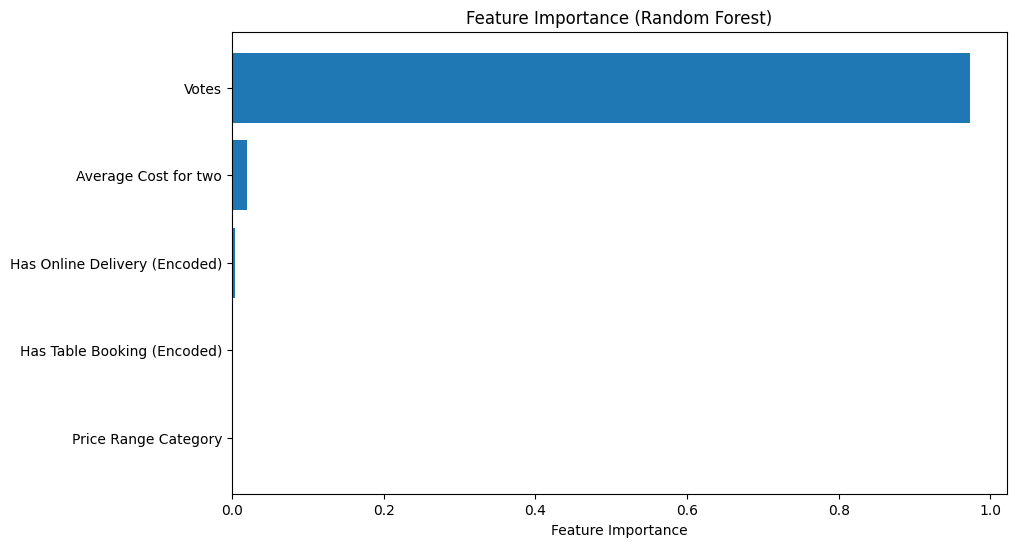

In [31]:
importances = rf_model.feature_importances_
sorted_idx = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature Importance")
plt.show()

This plot will help us identify which features are contributing most to the prediction of the target variable, Aggregate rating.

### Hyperparameter Tuning for Decision Tree and Random Forest

 hyperparameter tuning can significantly improve model performance. We will use **GridSearchCV** to tune the hyperparameters for both **Decision Tree** and **Random Forest** models.

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [33]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [34]:
# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}


In [35]:
# Use the best model to predict
best_rf_model = grid_search_rf.best_estimator_
rf_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
rf_r2_tuned = r2_score(y_test, rf_pred_tuned)
rf_mse_tuned = mean_squared_error(y_test, rf_pred_tuned)

print("Tuned Random Forest - R2:", rf_r2_tuned, "MSE:", rf_mse_tuned)

Tuned Random Forest - R2: 0.9493694740889752 MSE: 0.11524059521018072


The GridSearchCV will evaluate different combinations of hyperparameters using cross-validation and return the best parameters based on the negative mean squared error (since we want to minimize the error).

### Model Residual Analysis

Analyzing the residuals (the differences between actual and predicted values) helps identify if the model is underfitting or overfitting, and whether the assumptions of linearity, homoscedasticity, and normality of residuals are met.

In [36]:
# Calculate residuals for the Random Forest model (or any other model)
residuals_rf = y_test - rf_pred_tuned

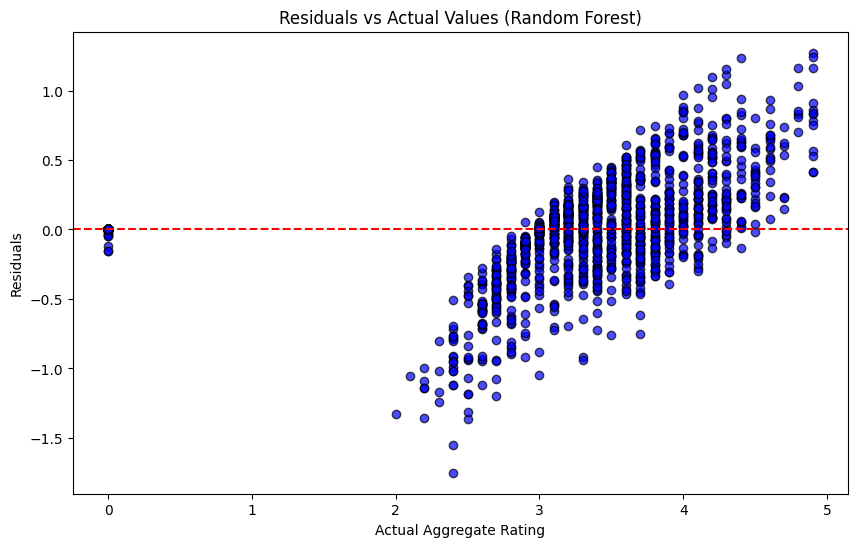

In [37]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_rf, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Actual Values (Random Forest)')
plt.xlabel('Actual Aggregate Rating')
plt.ylabel('Residuals')
plt.show()

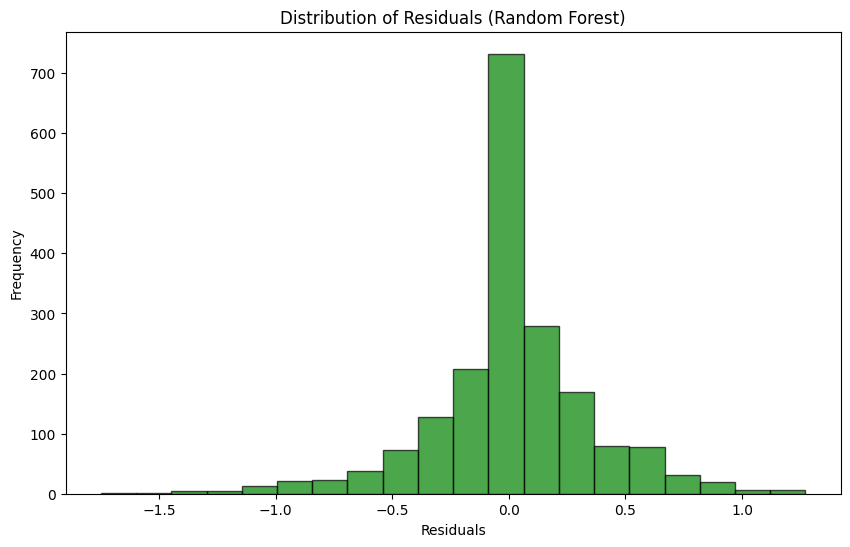

In [39]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_rf, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Model Interpretability (SHAP or LIME)

If we need  how the model makes predictions, we can use model interpretability techniques such as **SHAP** (Shapley Additive Explanations) or **LIME** (Local Interpretable Model-agnostic Explanations). These methods provide explanations for individual predictions, showing how much each feature contributes to a specific prediction.

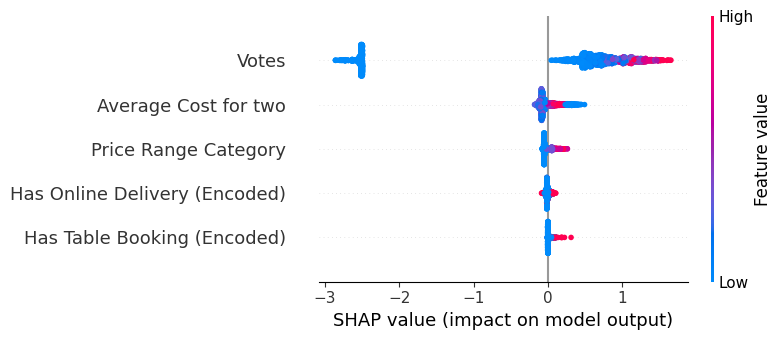

In [42]:
import shap

# Create the SHAP explainer
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test)